In [2]:
import numpy as np
import pandas as pd
from IPython.core.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Javascript
from itertools import combinations
from scipy.stats import ttest_ind

sns.set(style="whitegrid")
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

import warnings; warnings.simplefilter('ignore')
sns.set()

In [3]:
stud = pd.read_csv('stud_math.csv')

display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
# Функция, чтобы автоматизировать процесс по получению информации о колонке
def about_col(column):
    display(stud[column].value_counts())
    stud.loc[:, [column]].info()
    print ('Значений, упомянутых более 10 раз:', (stud[column].value_counts()>10).sum())
    print ("Уникальных значений:", stud[column].nunique())
    print ('Значений NAN в столбце:', stud[column].isnull().sum(axis = 0)
)

# Заменим загланые буквы в названиях на маленькие
stud.columns = map(str.lower, stud.columns)
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [8]:
# Ищем пропущенные значения
stud.isnull().sum(axis = 0)

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

## Анализ отдельных колонок

### School

GP    349
MS     46
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Значений, упомянутых более 10 раз: 2
Уникальных значений: 2
Значений NAN в столбце: 0


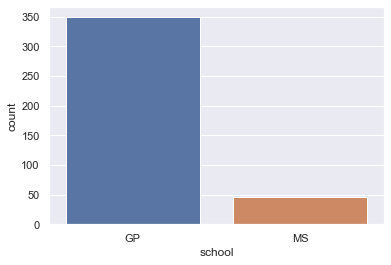

In [26]:
# Информация о колонке
about_col('school')

stud.school.value_counts()
sns.countplot(x='school', data = stud)

+ Дети в основном посещали школу GP

### Проверим, отличается ли балл в зависимости от этого параметра:

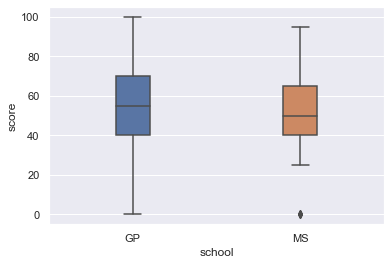

In [19]:
sns.boxplot(x = 'school', y = 'score', data = stud, width = 0.2)

### Sex / распределение по полу

F    208
M    187
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Значений, упомянутых более 10 раз: 2
Уникальных значений: 2
Значений NAN в столбце: 0


(array([208., 187.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

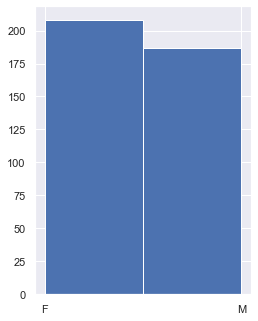

In [25]:
# Информация о колонке
about_col('sex')

fig = plt.figure()
axes = fig.add_axes([0, 0, 0.5, 1])
axes.hist(stud['sex'], bins = 2)

+ Преобладает женский пол

### Age

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
Значений, упомянутых более 10 раз: 5
Уникальных значений: 8
Значений NAN в столбце: 0


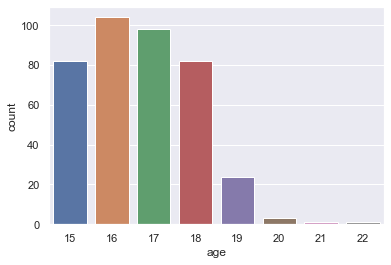

In [33]:
# Информация о колонке
about_col('age')

sns.countplot(x='age', data = stud)

+ Преобладает большое колличество детей, с возрастом 16 и 17 лет

### Address

U    295
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Значений, упомянутых более 10 раз: 2
Уникальных значений: 2
Значений NAN в столбце: 17


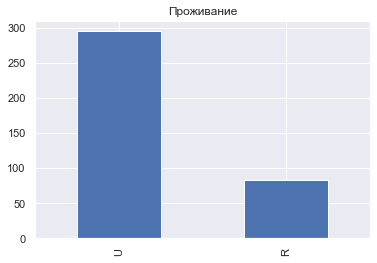

In [37]:
# Информация о колонке
about_col('address')

stud['address'].value_counts().plot(kind = 'bar', grid = 'True', title = 'Проживание')

+ По графику видно, что городские жители имеют лучший доступ к образованию

### Посмотрим, как место проживания влияет на средний балл:

address
R    50.0
U    55.0
Name: score, dtype: float64


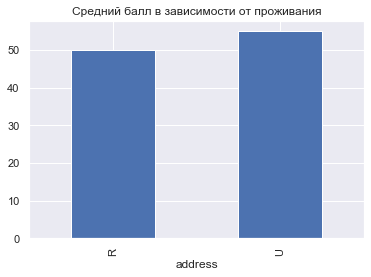

In [38]:
print(stud.groupby('address')['score'].median())
stud.groupby('address')['score'].median().plot(kind = 'bar', title = 'Средний балл в зависимости от проживания')

+ Судя по графику, городские жители все же имеют чуть более высокий балл (смотрим по медиане)

### Score

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Значений, упомянутых более 10 раз: 12
Уникальных значений: 18
Значений NAN в столбце: 6


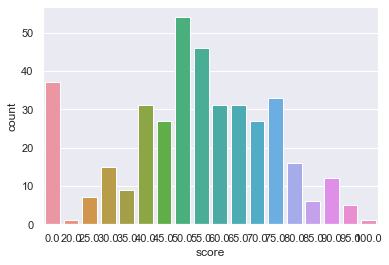

In [40]:
# Информация о колонке
about_col('score')

sns.countplot(x='score', data = stud)

+ Распределение баллов похоже на нормальное

## Выбросы

In [4]:
# Функция для расчета интерквартильного расстояния (межквартильного размаха)
def show_out(serie):
    median = serie.median()
    perc25 = serie.quantile(0.25)
    perc75 = serie.quantile(0.75)
    IQR = perc75 - perc25
    
    print('25-й прецентиль: {},'.format(perc25), '75-й прецентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5 * IQR, l = perc75 + 1.5 * IQR))
    
    serie.hist(label = 'Все значения')
    serie.loc[serie.between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR)].hist(label = 'IQR')
    plt.legend()
    
    print('Выбросы:')
    print(serie[serie < perc25 - 1.5 * IQR])
    print(serie[serie > perc75 + 1.5 * IQR])
    
    return median, perc25, perc75, IQR

### Расчитаем выбросы для оценок (score):

25-й прецентиль: 40.0, 75-й прецентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].
Выбросы:
Series([], Name: score, dtype: float64)
Series([], Name: score, dtype: float64)


(55.0, 40.0, 70.0, 30.0)

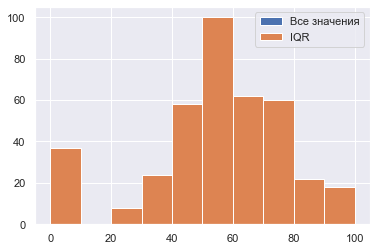

In [5]:
show_out(stud.score)

+ Согласно формуле интерквартильного расстояния (межквартильного размаха), мы получили расчет, где IQR у нас 30.0, а границы выбросов выходят за 100 и имеют параметр 115. Среднее значение составляет 55.0.

### Расчитаем выбросы для пропусков (absences):

25-й прецентиль: 0.0, 75-й прецентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Выбросы:
Series([], Name: absences, dtype: float64)
40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64


(4.0, 0.0, 8.0, 8.0)

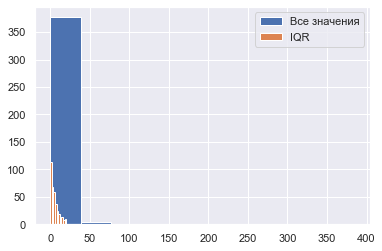

In [6]:
show_out(stud.absences)

+ Мы получили расчет, где IQR у нас составляет 8.0, а границы выбросов не большие, -12 и 20. Среднее значение 4.0.

### Расчитаем выбросы для возрастов (age):

25-й прецентиль: 16.0, 75-й прецентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Выбросы:
Series([], Name: age, dtype: int64)
247    22
Name: age, dtype: int64


(17.0, 16.0, 18.0, 2.0)

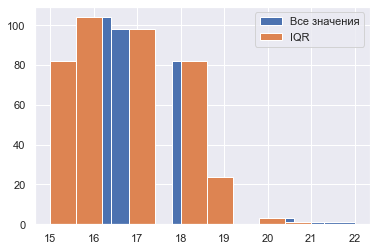

In [7]:
show_out(stud.age)

+ Расчет показал, что IQR у нас всего 2.0, а границы выбросов так же не большие, 13 и 21. Среднее значение составляет 17.0.

### Рассмотрим эти столбцы дополнительно:

In [15]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

### Отбросим выбросы меньше 20 для удобства:

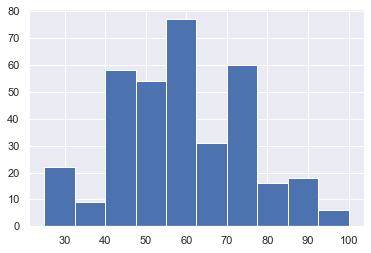

In [6]:
stud[stud['score'] > 20].score.hist()

### Посмотрим на учеников, у которых балл меньше 20:

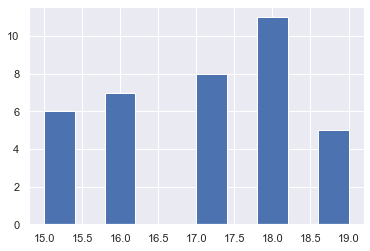

In [7]:
stud[stud['score'] < 20].age.hist()

In [31]:
stud[stud['score'] < 20].describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,37.000000,36.000000,34.000000,32.000000,37.000000,35.000000,37.000000,34.000000,36.000000,36.000000,35.000000,36.0,37.0
mean,17.054054,2.333333,2.323529,1.500000,1.945946,0.857143,-5.837838,3.823529,3.111111,3.166667,3.657143,0.0,0.0
std,1.311190,1.041976,1.147344,0.718421,0.911225,1.033067,2.733674,1.028992,0.887300,1.341641,1.304807,0.0,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,16.000000,1.750000,1.000000,1.000000,1.000000,0.000000,-6.000000,3.000000,3.000000,2.000000,3.000000,0.0,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,1.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,0.0,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,-3.000000,4.750000,4.000000,4.000000,5.000000,0.0,0.0
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0


+ Судя по даным это ученики разных возрастных групп

In [46]:
stud[stud['score'] < 20].describe(include = ['object'])

,school,sex,address,famsize,pstatus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,37,37,36,34,33,35,33,35,35,37,35,34,35,34,36,32,35
unique,2,2,2,2,2,5,4,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,yes
freq,33,22,26,27,31,12,18,16,23,36,20,27,20,25,30,26,19


### Уберем этих учеников из датасета:

In [18]:
stud_new = stud[stud['score'] > 20]

### Посмотрим на корреляцию данных в датасете:

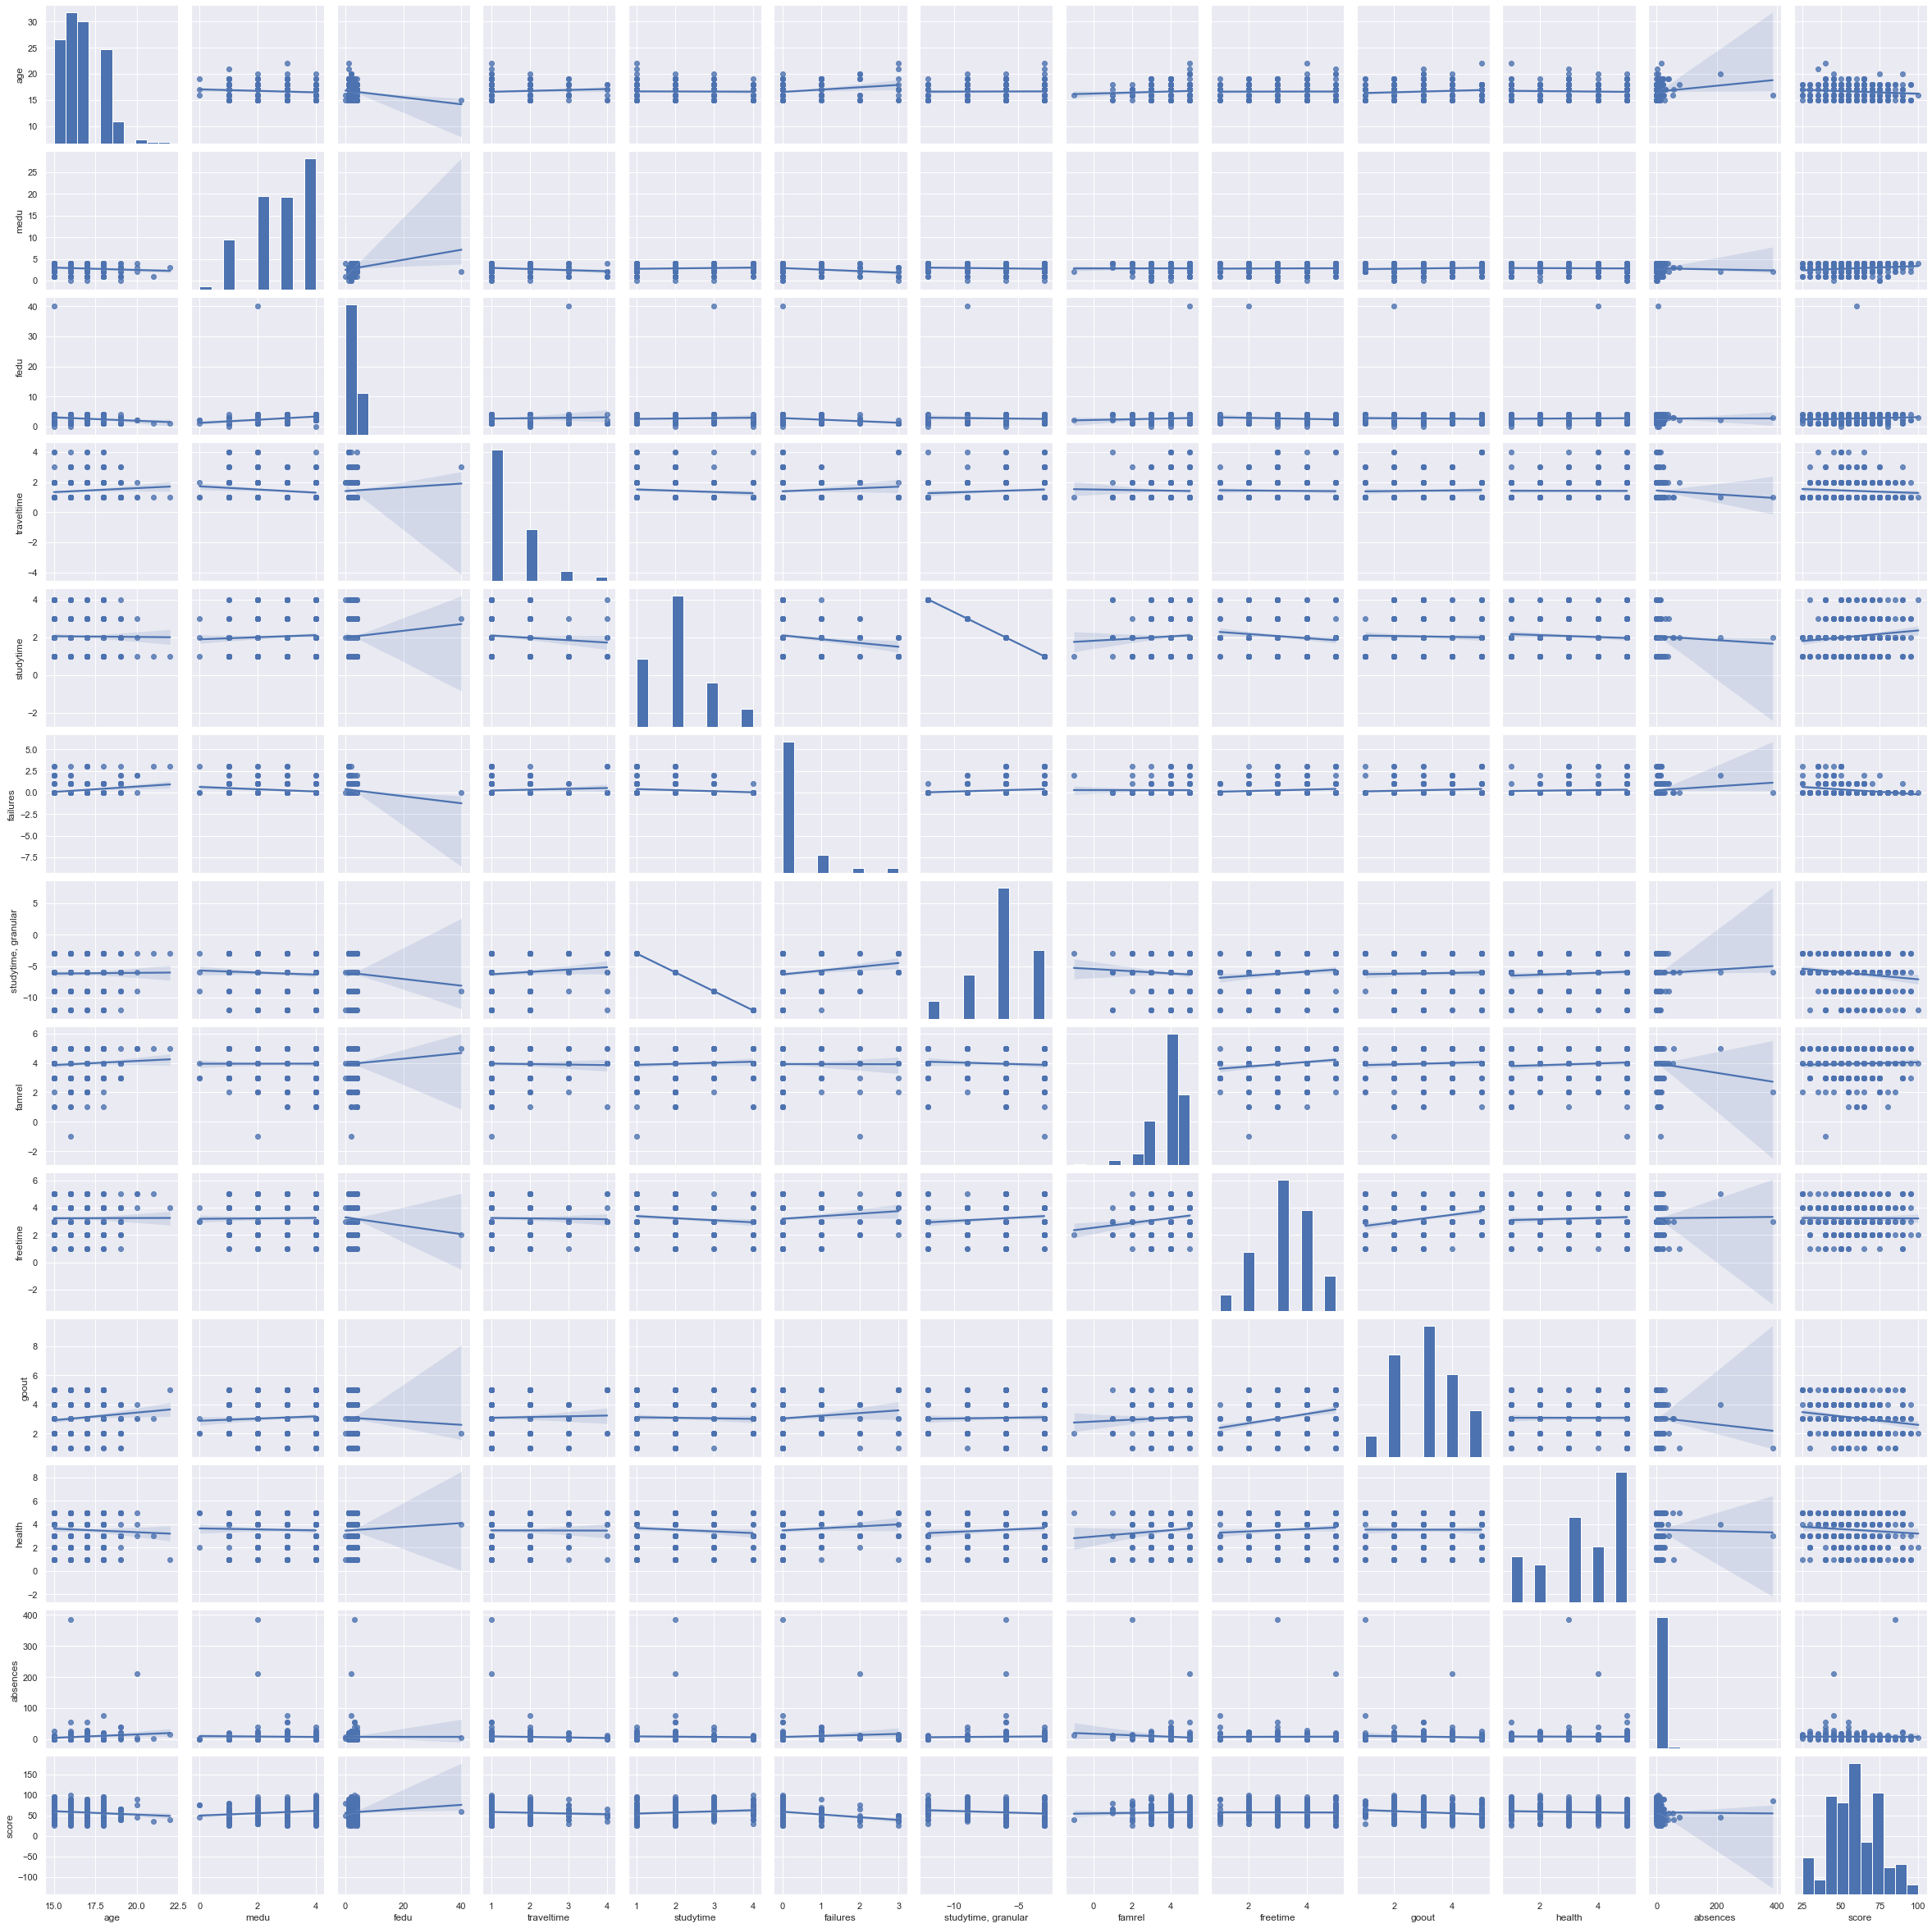

In [5]:
#Рассматриваем графики с числовыми значенияи
sns.pairplot(data = stud_new, kind = 'reg')

Из данной корреляции вырисовываются два значения:

+ по возрасту
+ по пропускам

Можно сделать вывод, что чем старше человек, тем больше пропускает и хуже сдает экзамен. Но в тоже время, чем больше человек пропускает, тем лучше он сдает экзамен

### Так же на графике есть оценки с показателем 0, их можно удалить и не учитывать:

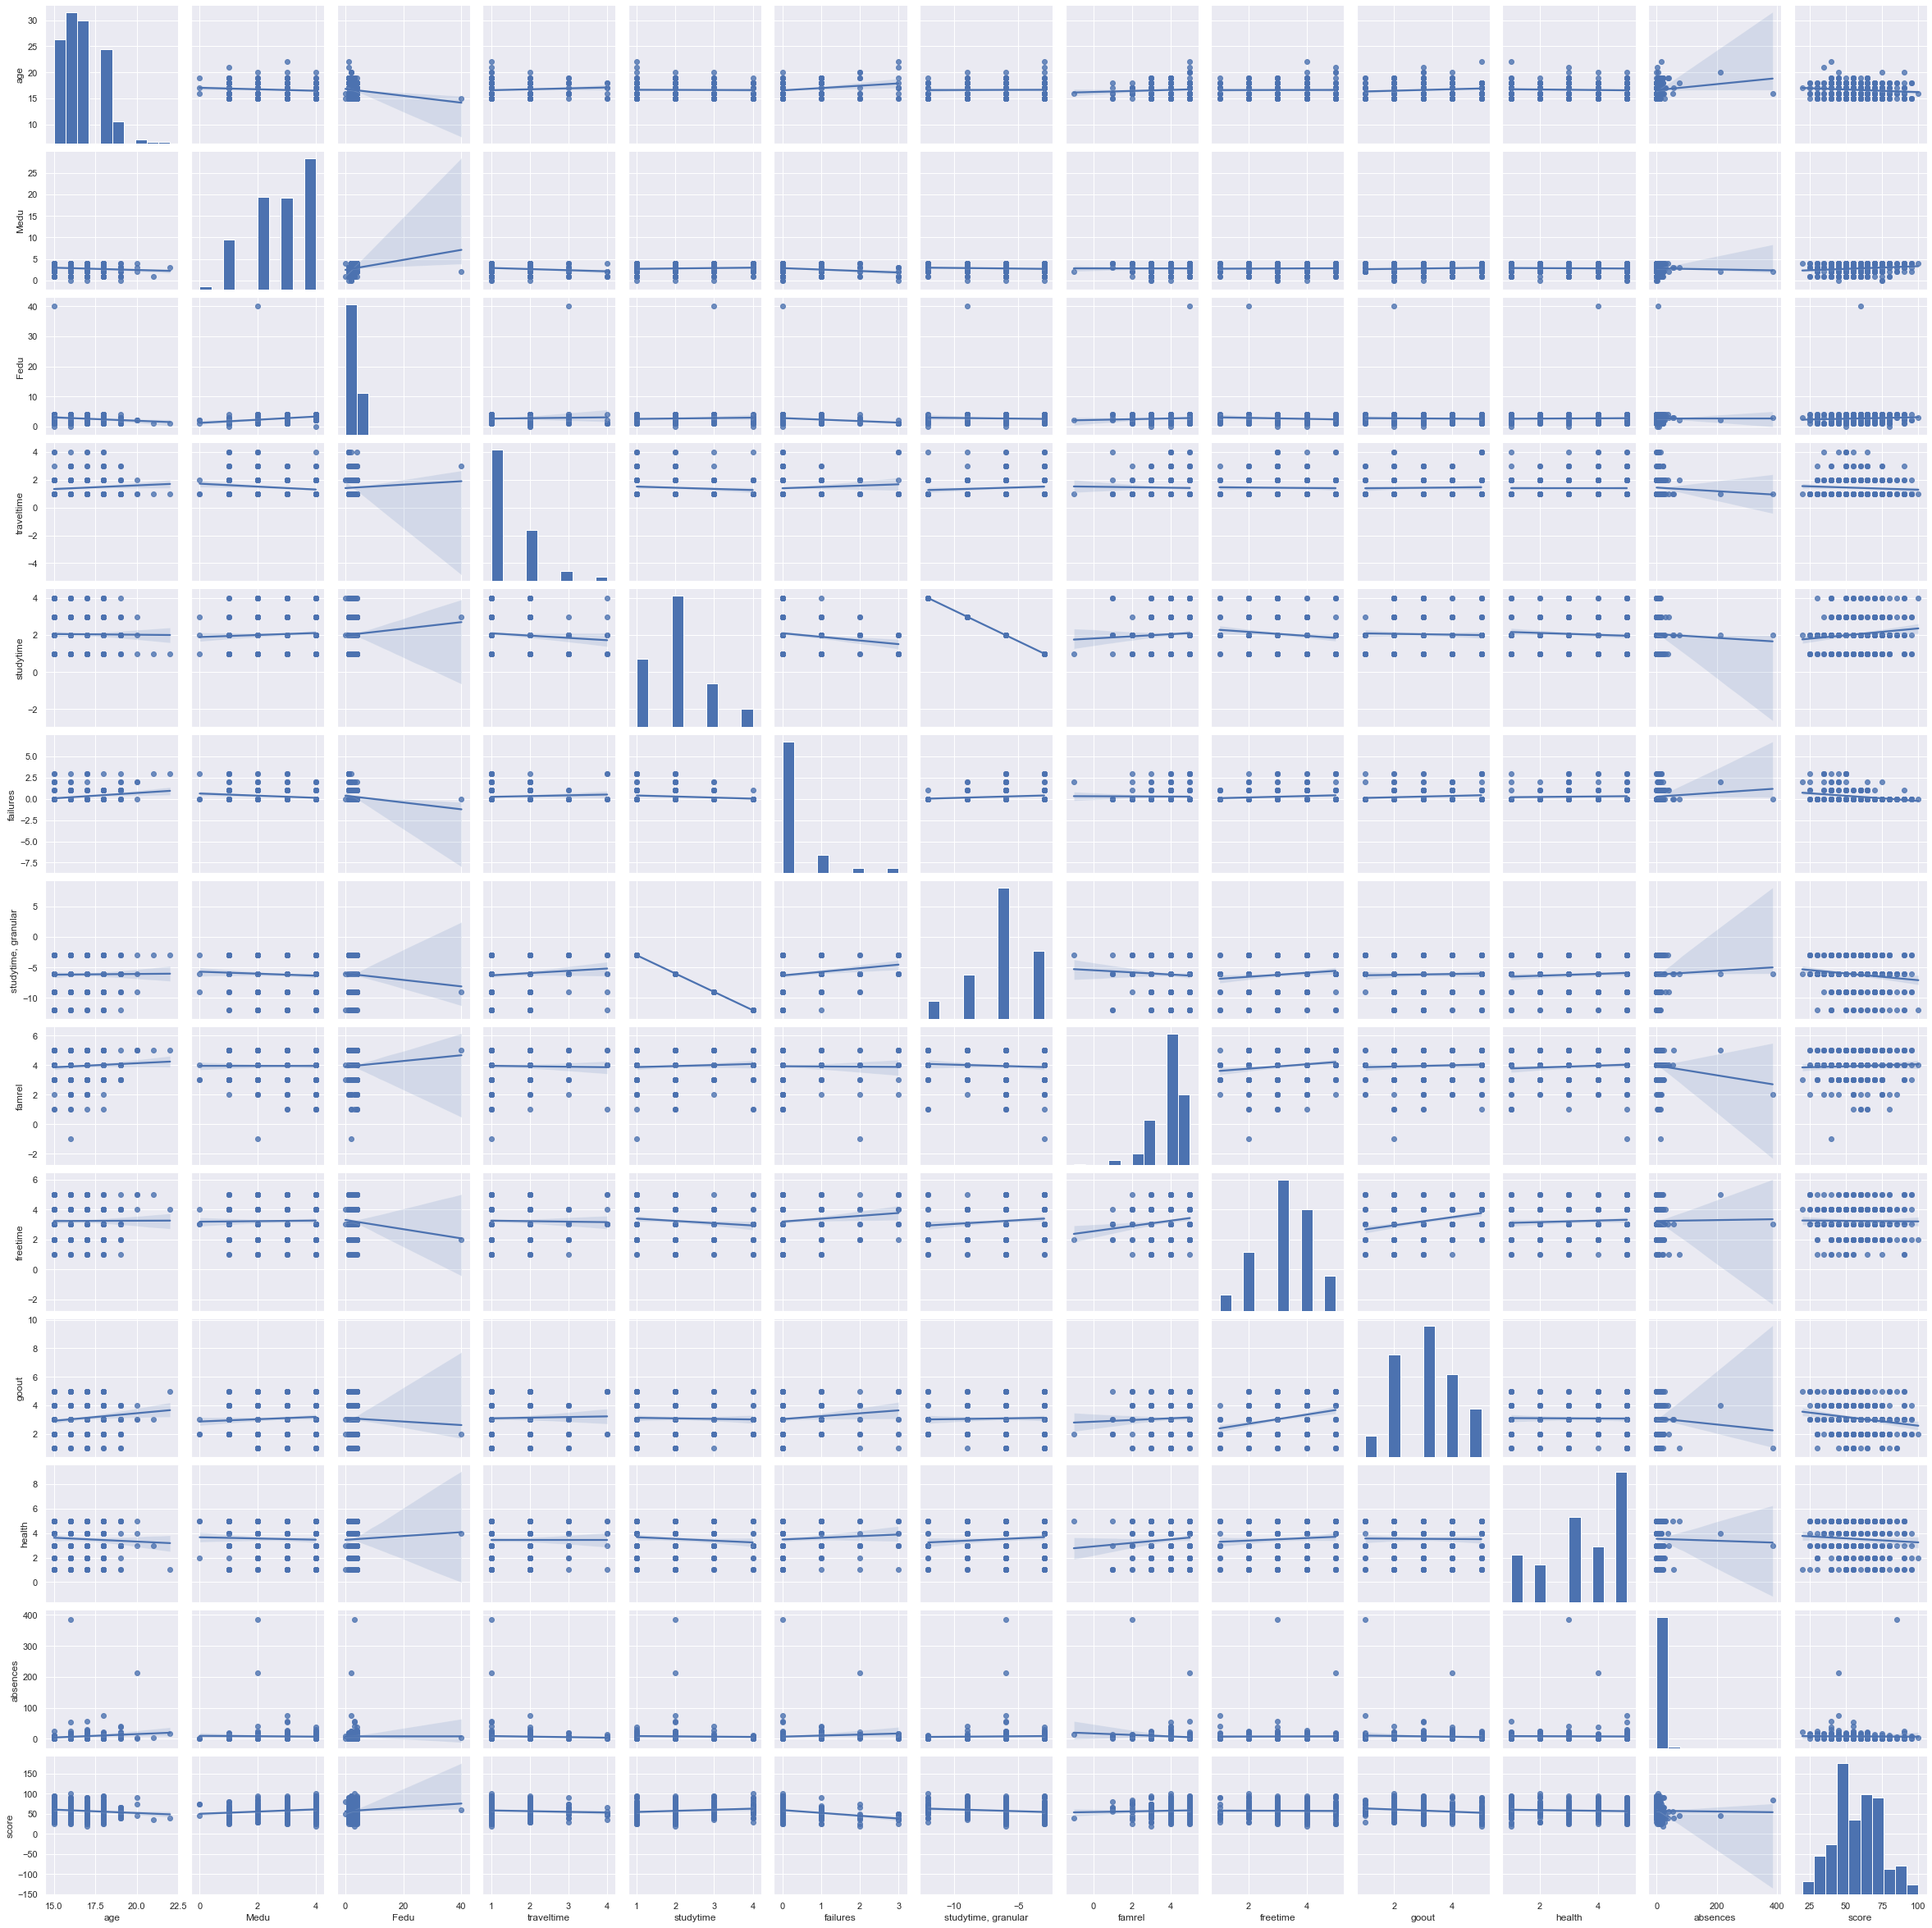

In [6]:
stud1 = stud[stud['score'] > 0]
sns.pairplot(stud1, kind = 'reg')

+ Теперь больше видна зависимоть возраста, пропусков и итоговой оценки

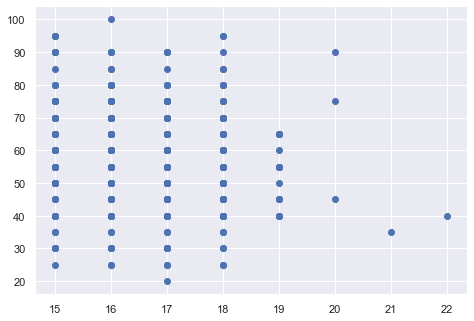

In [21]:
#Проверим наши гипотезы наглядно еще одним способом
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = stud1['age'], y = stud1['score'])

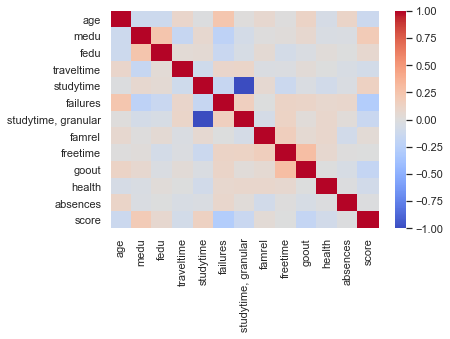

In [89]:
correlation = stud_new.corr()
sns.heatmap(correlation, annot = False, cmap = 'coolwarm')

+ Параметры studytime и studytime, granular линейно зависимы друг от друга и имеют хороший уровень корреляции. Также, мы видим положительную корреляцию между образованием родителей, параметром studytime и оценками, а также обратную корреляцию между оценками и неудачами

## Анализ номинативных переменных

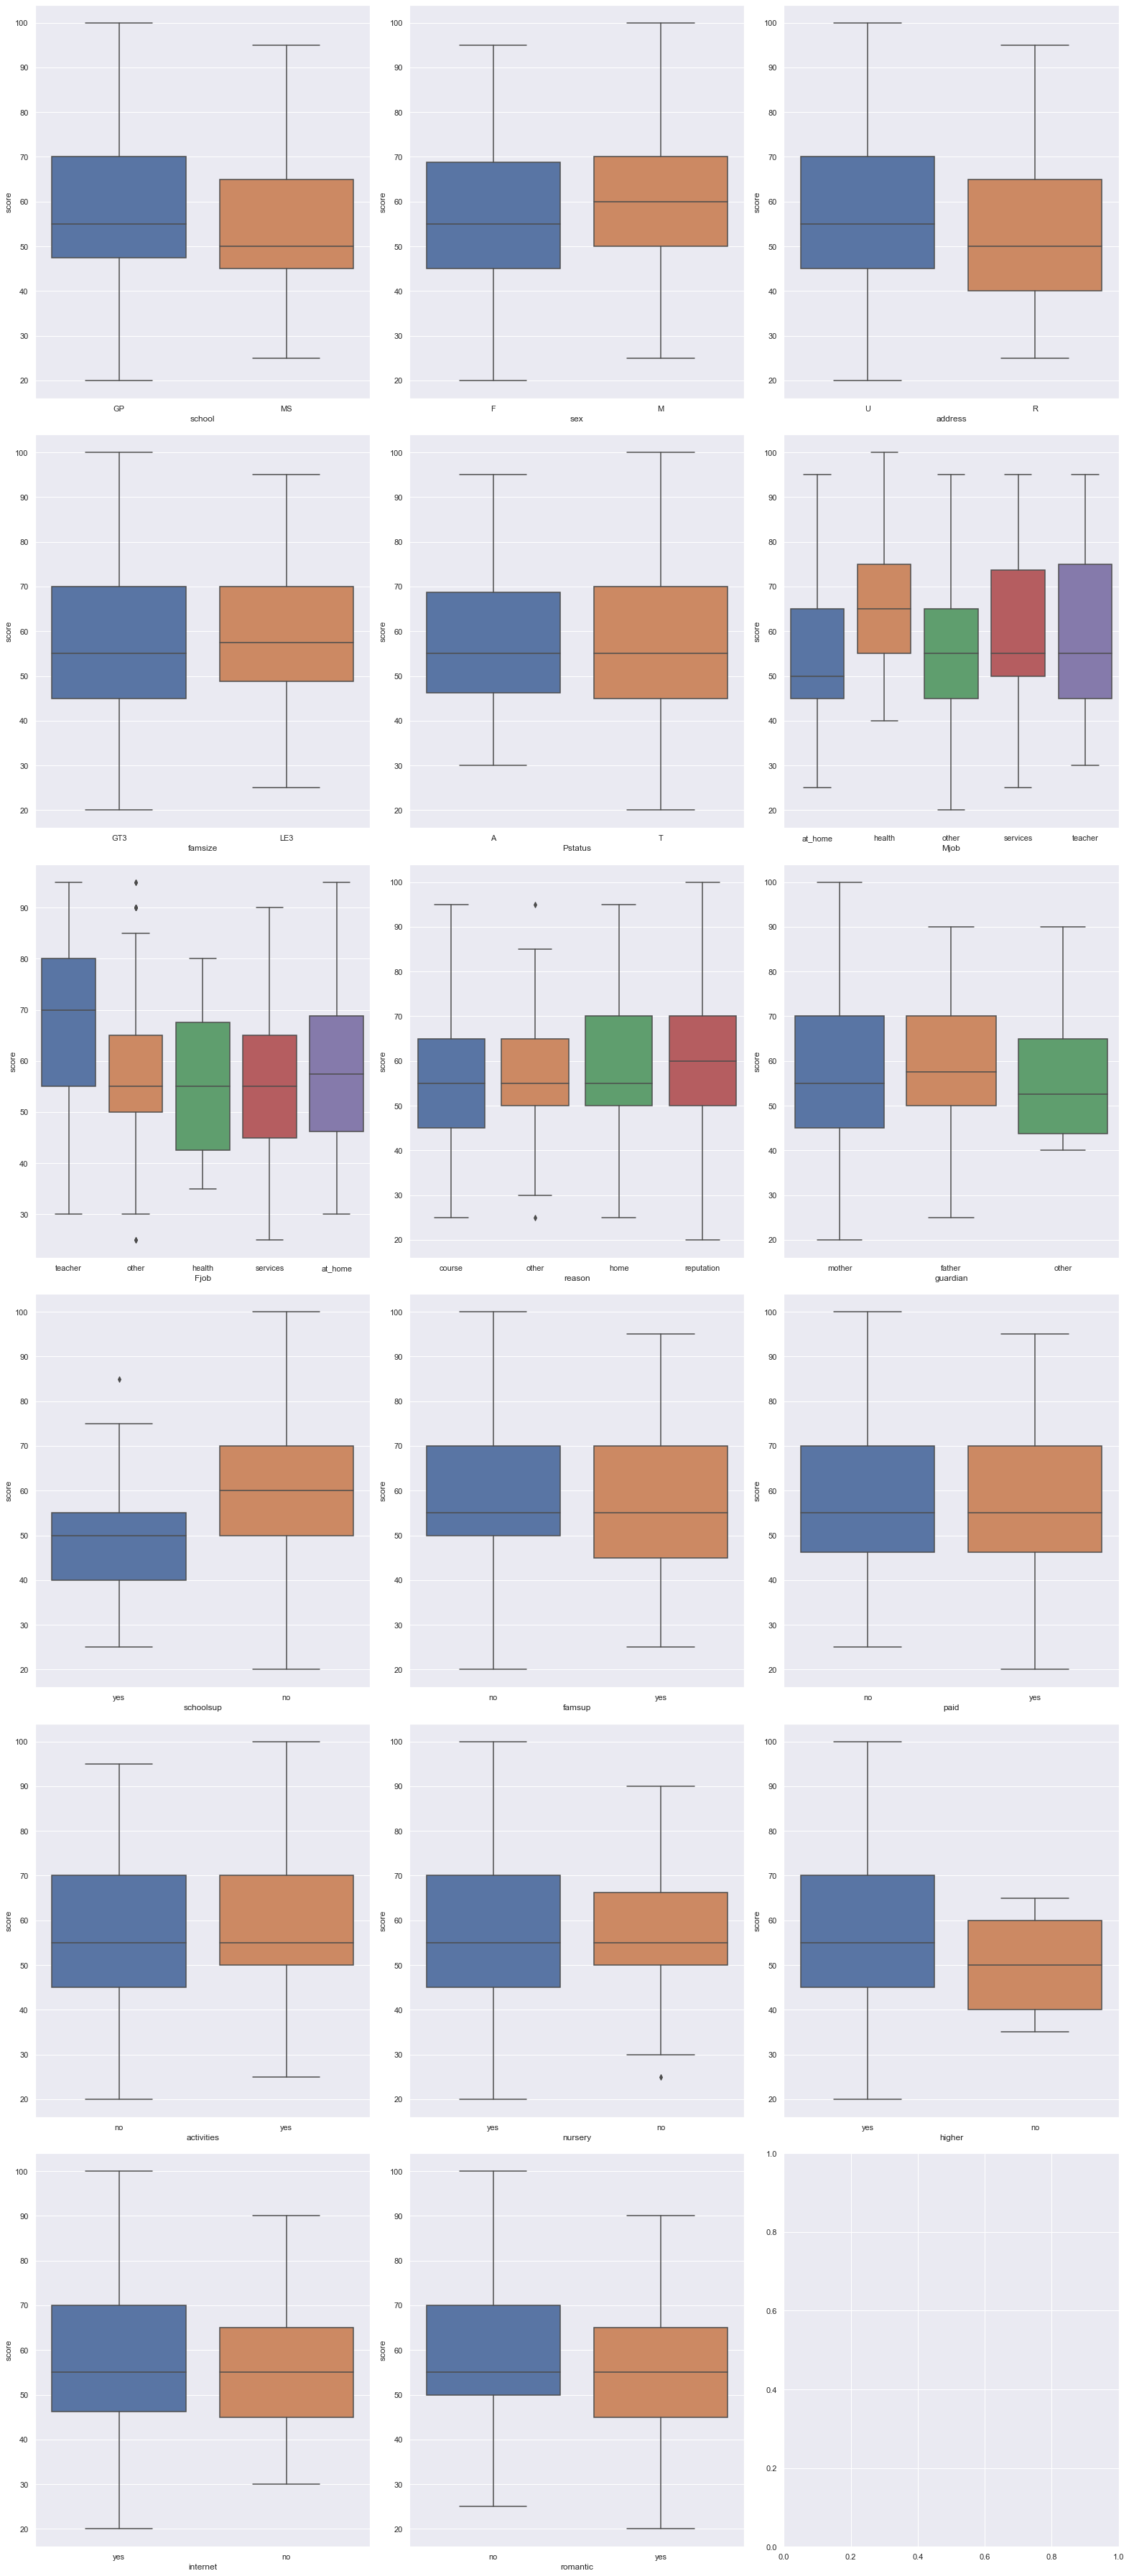

In [10]:
def count_plots(stud1):
    fig, axes = plt.subplots(6, 3, figsize = (22, 50))
    
    count = 0
    
    for column_name in stud:
        if stud1[column_name].dtype == 'object':
            ax = axes[count // 3, count % 3]
            
            df = stud1.sort_values(by = [column_name])
            sns.boxplot(data = stud1, x = column_name, y = "score", ax = ax)
            
            count += 1
            
    fig.tight_layout()
    fig.show()

count_plots(stud1)

Как итог, опишем признаки и значения тех, у кого лучшие результаты:

+ Большинство из школы GP
+ Мужской пол (парни)
+ С образованием матерей - гос. служба
+ С образованием отцов - учителя
+ Выбирающие школу по репутации и близости к дому
+ Много учатся
+ Посещали детский сад
+ Мало гуляют и без отношений
+ С плохим здоровьем

## Тест Стьюдента

In [25]:
for col in stud1.columns:
    
    combs = list(combinations(stud[col].unique(), 2))
    
    for a, b in combs:
        a_values = stud1.loc[stud[col] == a, 'score']
        b_values = stud1.loc[stud[col] == b, 'score']        
        pval = ttest_ind(a_values, b_values).pvalue
        if pval <= (0.05 / len(combs)):
            print(f"Найдены статистически значимые различия для колонки {col}")
            break

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки studytime, granular
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки score


+ Найдено несколько статистически значимых колонок для построения будущей модели. Но попробуем найти больше зависимостей, рассматривая детальнее группировку нескольких признаков

### Распределение времени до школы для учеников, проживающих в городе:

,traveltime,score
traveltime,1.000000,-0.059516
score,-0.059516,1.000000


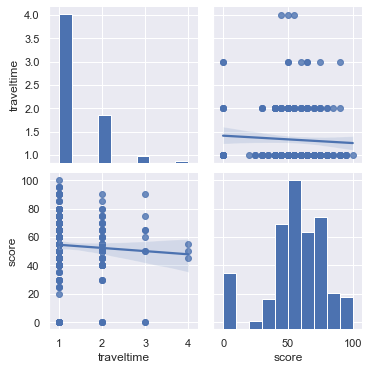

In [46]:
sns.pairplot(stud[stud.address == 'U'].loc[:, ['traveltime','score']], kind = 'reg')
stud[stud.address == 'U'].loc[:, ['traveltime','score']].corr()

+ Как мы видим, у учеников, проживающих в городе, есть небольшое снижение среднего балла с увеличением времени в пути до школы

### Оценки в зависимости от пола ученика:

Статистические показатели оценок у мальчиков:


count    185.000000
mean      54.648649
std       22.572608
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Статистические показатели оценок у девочек:


count    204.000000
mean      50.098039
std       23.070682
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: score, dtype: float64

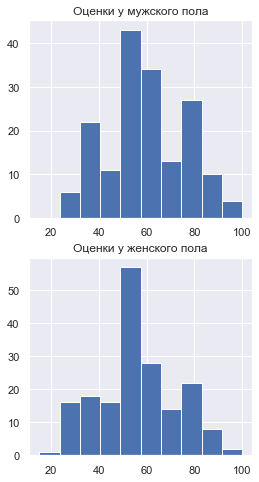

In [37]:
fig, axes = plt.subplots(2, 1, figsize = (4,8))

axes[0].hist(stud.score[stud.sex == 'M'], range = (15, 100))
axes[0].set_title('Оценки у мужского пола')

axes[1].hist(stud.score[stud.sex == 'F'], range = (15, 100))
axes[1].set_title('Оценки у женского пола')

print('Статистические показатели оценок у мальчиков:')
display(stud[stud.sex == 'M'].score.describe())

print('Статистические показатели оценок у девочек:')
display(stud[stud.sex == 'F'].score.describe())

+ Оценки распределены в целом нормально, но у мальчиков оценка, в среднем на 5 баллов больше, чем у девочек

### Оценки в зависимости от школы:

Статистические показатели для школы GP:


count    344.000000
mean      52.630814
std       23.116772
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Статистические показатели для школы MS:


count    45.000000
mean     49.444444
std      21.379212
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

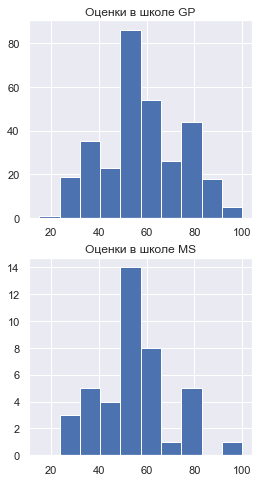

In [39]:
fig, axes = plt.subplots(2, 1, figsize = (4,8))

axes[0].hist(stud.score[stud.school == 'GP'], range = (15, 100))
axes[0].set_title('Оценки в школе GP')

axes[1].hist(stud.score[stud.school == 'MS'], range = (15, 100))
axes[1].set_title('Оценки в школе MS')

print('Статистические показатели для школы GP:')
display(stud[stud.school == 'GP'].score.describe())

print('Статистические показатели для школы MS:')
display(stud[stud.school == 'MS'].score.describe())

+ Средняя оценка в школе GP в среднем на 4 балла выше, чем в школе MS

### Зависимость оценки и возраста ученика:

,age,score
age,1.000000,-0.155726
score,-0.155726,1.000000


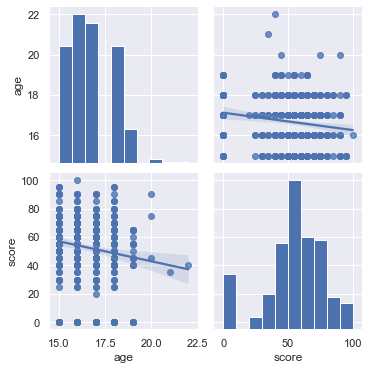

In [42]:
sns.pairplot(stud.loc[:, ['age','score']], kind = 'reg')
stud.loc[:, ['age','score']].corr()

+ Есть тенденция к снижению средней оценки с повышением возраста ученика, как и было ранее замечено в одном из предварительных выводов

## Выводы

В результате EDA анализа мы провели анализ данных и получили следующее:

В данных достаточно мало уникальных значений по каждому столбцу, поэтому анализировать зависимости получается с большой точностью.

Выбросы были найдены в столбцах 'age', 'score', 'absences', что позволяет сделать вывод, что данные достаточно чистые. Данные выбросы оказались не значительны, в районе не больших значений. В столбце 'age' у нас есть выброс на значении 21 год и выше, согласно здравому смыслу мы не будем выкидывать это значение, так как по ученикам в возрасте 21 год и старше мы можем провести дополнительный анализ данных, если это потребуется и вывести из него определенные интересные заключения. Большое колличество учеников имеют возраст 16 и 17 лет. Средний возраст учеников составляет 17 лет. Ученики в возрасте 21 год и старше тоже имеют право на существование и играют роль в общем анализе данных по оценкам и пропускам. Также, данные из 'age' и 'absences' у нас представлены в ранговой шкале, что в дальнейшем мы можем использовать при ранговой корреляции Спирмена или Кендалла. Если говорить в общих чертах, то сама формула интерквартильного расстояния (межквартильного размаха) в большистве своем не всегда показывает точно. Например метод IQR, это простой, но не совершенный способ поиска выбросов и нужно дополнительно подключать логику, смотреть внимательно на описание и данные из датасета.

При корреляции данных были замечены параметры, которые следует не учитывать в дальнейшем (удалить), это "studytime, granular", т.к. они имеют высокий уровень корреляции. Положительная корреляция параметров 'age', 'score' и 'absences' может говорить о том, что с повышением возраста ученика, оценки ухудшаются как и с пропусками занятий. Также, у учеников мужского пола средняя оценка на 5 баллов выше, чем у учеников женского пола.

Ученики, проживающие в городе, имеют небольшое снижение среднего балла с увеличением времени в пути до школы, в отличии от учеников, проживающих за городом, которым практически все равно, как долго им добираться до школы, этот критерий почти не влияет на их оценки. Все они много учатся, мало гуляют (нет времени на это) и в основном не имеют отношений, как итог - возможно поэтому имеют плохое здоровье. Конечно, уровень семейных отношений положительно влияет на успеваемость учеников, это очевидно, так как большинство семей, это полноценные семьи, где образование у матерей, это гос. служба, а образование отцов - учителя. Большинство детей в таких семьях до школы посещали детский сад. Также, выбирают школу по репутации и близости к дому.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'address', 'age', 'medu', 'fedu', 'mjob', 'fjob', 'studytime', 'failures', 'schoolsup', 'goout', 'absences', 'score'